<a href="https://colab.research.google.com/github/gmvula/DSA-Chatbot/blob/main/DSA_Assignment_WIP_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1: Load and Visualize Survey Data**

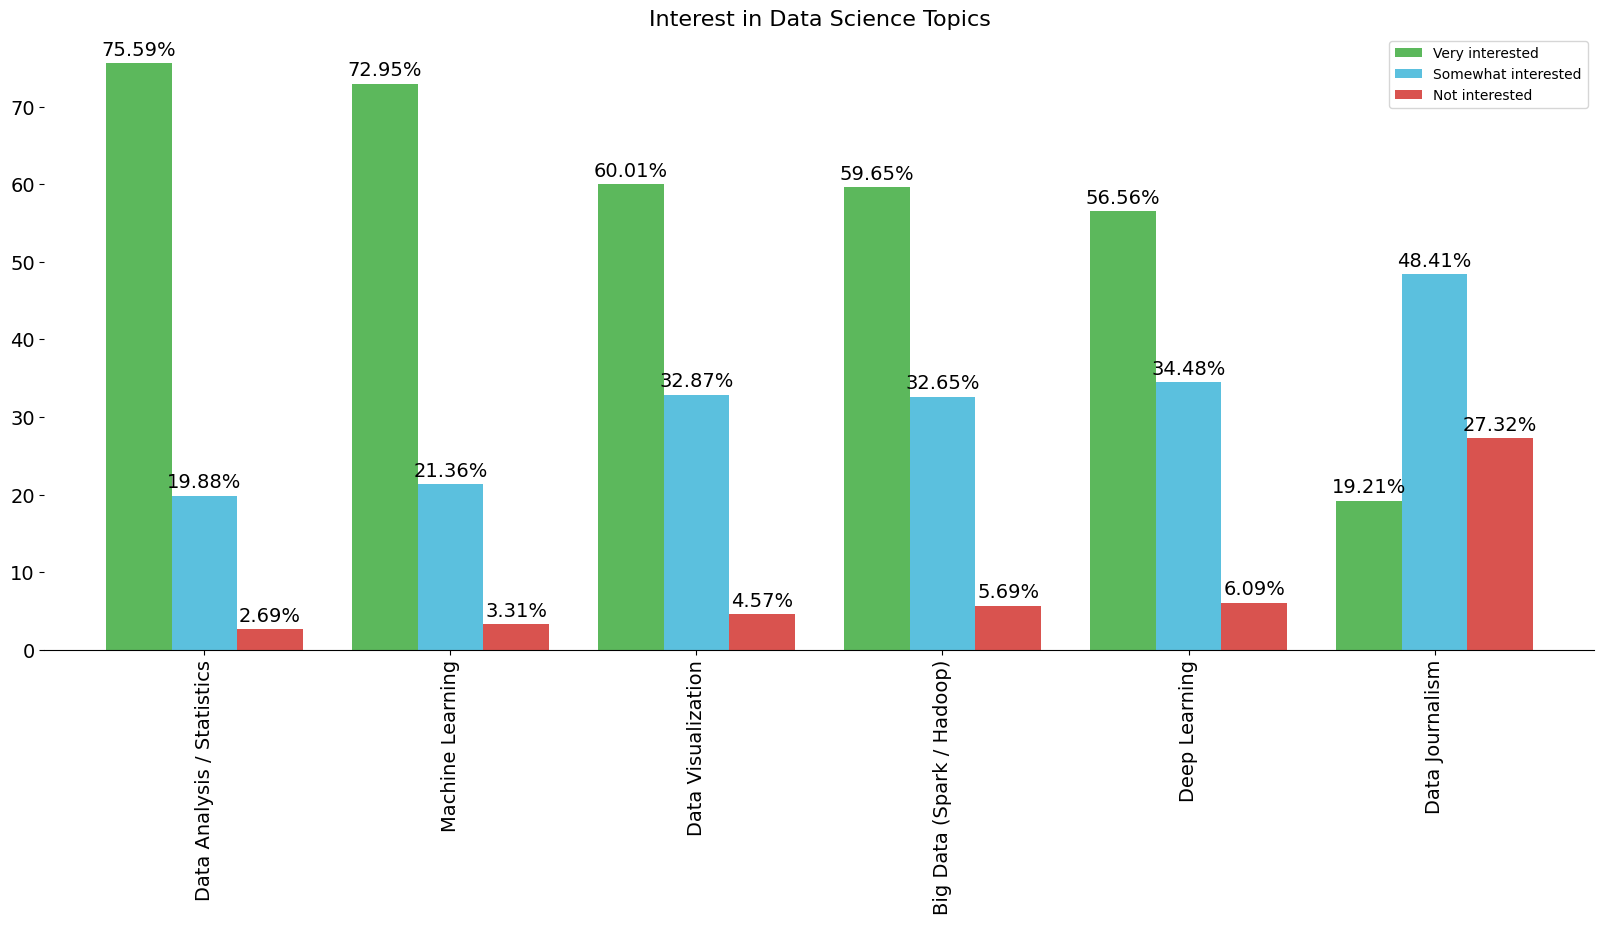

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load survey data from a CSV file
survey_data = pd.read_csv('/content/sample_data/Topic_Survey_Assignment.csv', index_col=0)

# Transform columns to numeric types, and handle errors by coercing them
for col_name in survey_data.columns:
    survey_data[col_name] = pd.to_numeric(survey_data[col_name], errors='coerce')

# Replace any missing values with zeros
survey_data.fillna(0, inplace=True)

# Calculate percentages based on a given total (2233) and round to two decimal places
percentage_data = (survey_data / 2233) * 100
percentage_data = percentage_data.round(2)

# Sort the data by the column labeled 'Very interested'
percentage_data.sort_values(by='Very interested', ascending=False, inplace=True)

# Create a bar chart
bar_ax = percentage_data.plot(kind='bar',
                               figsize=(20, 8),
                               width=0.8,
                               color=['#5cb85c', '#5bc0de', '#d9534f'],
                               fontsize=14)

# Set the title for the chart
bar_ax.set_title('Interest in Data Science Topics', fontsize=16)

# Remove the borders on the top, right, and left
bar_ax.spines['top'].set_visible(False)
bar_ax.spines['right'].set_visible(False)
bar_ax.spines['left'].set_visible(False)

# Annotate percentages above the bars
for patch in bar_ax.patches:
    bar_width, bar_height = patch.get_width(), patch.get_height()
    bar_x, bar_y = patch.get_xy()
    bar_ax.annotate('{:.2f}%'.format(bar_height), (bar_x + bar_width / 2, bar_y + bar_height + 1), ha='center', fontsize=14)

plt.show()


**Part 2: Visualizing Claims Data**

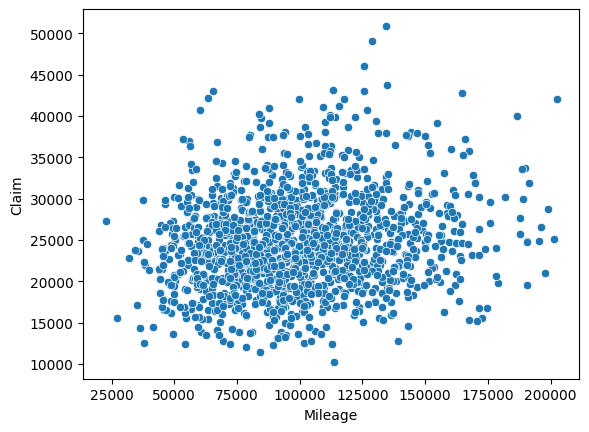

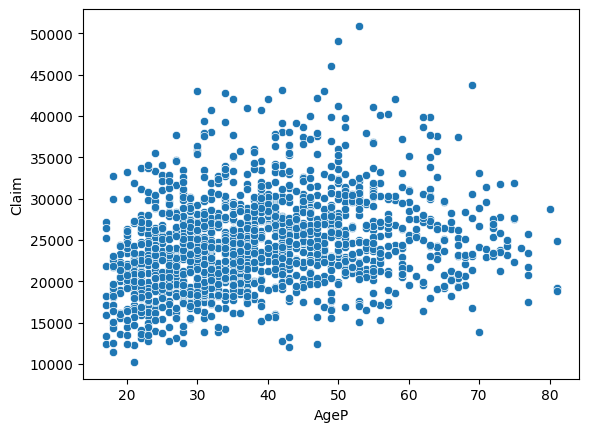

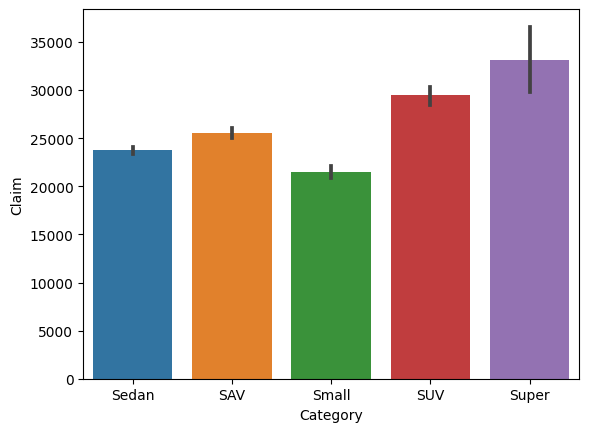

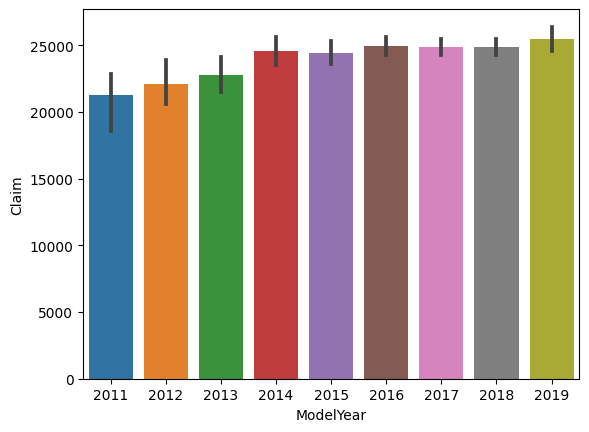

Category
SAV      25567.220256
SUV      29439.955177
Sedan    23759.341389
Small    21458.093665
Super    33107.498750
Name: Claim, dtype: float64
ModelYear
2011    21251.196667
2012    22089.076316
2013    22797.422576
2014    24559.396422
2015    24396.627463
2016    24930.396192
2017    24859.324408
2018    24844.633413
2019    25487.106147
Name: Claim, dtype: float64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read claims data from a CSV file
claims_data = pd.read_csv('/content/sample_data/ClaimsData.csv')

# Create scatter plots for Mileage vs Claim and AgeP vs Claim
sns.scatterplot(data=claims_data, x='Mileage', y='Claim')
plt.show()

sns.scatterplot(data=claims_data, x='AgeP', y='Claim')
plt.show()

# Generate bar plots for 'Category' and 'ModelYear'
sns.barplot(data=claims_data, x='Category', y='Claim')
plt.show()

sns.barplot(data=claims_data, x='ModelYear', y='Claim')
plt.show()

# Calculate and display average claim amount by category and model year
print(claims_data.groupby('Category')['Claim'].mean())
print(claims_data.groupby('ModelYear')['Claim'].mean())


Interpre

**Part 3: Fitting and Evaluating Decision Tree Model**

Mean Absolute Error: 5250.107966666667


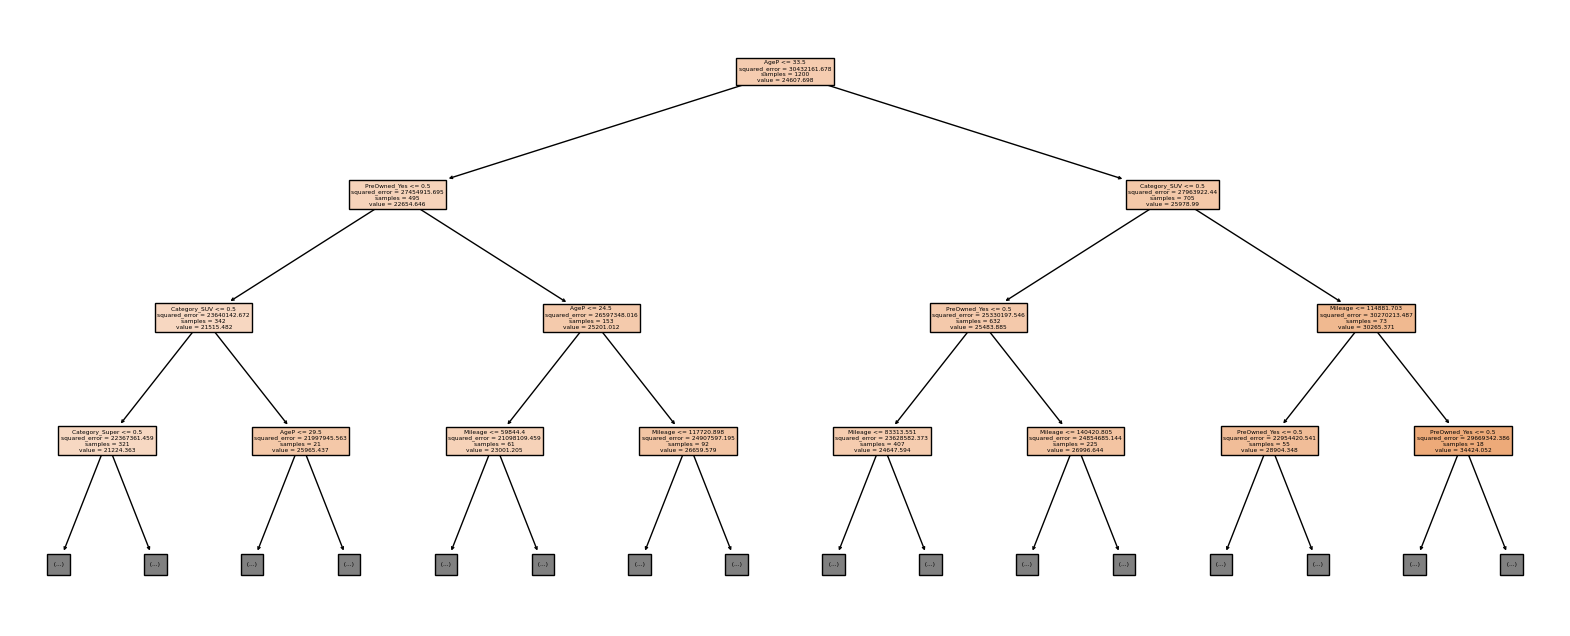

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Splitting features and target variable
features = claims_data.drop(columns=['Claim'])
target = claims_data['Claim']

# Apply One-Hot Encoding to transform categorical variables
features_encoded = pd.get_dummies(features, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=0)

# Create and train Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=0)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = decision_tree_model.predict(X_test)

# Evaluate the model using Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

# Plotting the decision tree (optional)
plt.figure(figsize=(20, 8))
plot_tree(decision_tree_model, filled=True, feature_names=features_encoded.columns, max_depth=3)
plt.show()
